# Install and Import Libraries

In [1]:
# Install Data and Visualization Tools
!pip install pandas
!pip install yfinance
!pip install matplotlib
!pip install numpy
# Install Machine Learning Libraries
!pip install scikit-learn
!pip install statsmodels
!pip install pmdarima

In [2]:
# Import Libraries
import pandas as pd
import yfinance as yf
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm

# Get Data

In [3]:
# Get the list of stock tickers
tickers=['WMT', 'TGT', 'COST', 'HD', 'DG']
data=yf.download(tickers, start = '2015-01-01', end = None)
data

C:\Users\leonh\AppData\Local\Temp\ipykernel_35284\4083059370.py:3: FutureWarning: YF.download() has changed argument auto_adjust default to True
  data=yf.download(tickers, start = '2015-01-01', end = None)
[*********************100%***********************]  5 of 5 completed


Price            Close                                                  \
Ticker            COST          DG          HD         TGT         WMT   
Date                                                                     
2015-01-02  114.297493   61.930454   80.874931   55.703117   23.320906   
2015-01-05  112.998024   61.527977   79.178139   54.704861   23.253033   
2015-01-06  114.491249   60.749226   78.935745   54.697464   23.432213   
2015-01-07  116.484833   61.484230   81.641220   56.767925   24.053928   
2015-01-08  117.485634   60.819260   83.447479   57.034130   24.561617   
...                ...         ...         ...         ...         ...   
2025-07-31  938.340027  104.900002  367.510010  100.500000   97.980003   
2025-08-01  952.520020  108.529999  373.660004   99.769997   98.489998   
2025-08-04  955.369995  110.940002  380.820007   99.790001   99.589996   
2025-08-05  943.630005  110.860001  385.410004  102.430000   99.309998   
2025-08-06  961.599976  112.970001  388.040009  104.940002  102.190002   

Price             High                                                  ...  \
Ticker            COST          DG          HD         TGT         WMT  ...   
Date                                                                    ...   
2015-01-02  115.540466   62.534186   82.618636   56.671801   23.543528  ...   
2015-01-05  114.741425   62.184205   80.366668   55.836225   23.434930  ...   
2015-01-06  115.371017   62.044185   79.811508   55.229872   23.551669  ...   
2015-01-07  116.573605   61.781724   81.688134   56.901027   24.075647  ...   
2015-01-08  117.921490   61.615480   83.658597   57.492594   24.615914  ...   
...                ...         ...         ...         ...         ...  ...   
2025-07-31  944.641295  106.349998  372.809998  102.629997   98.629997  ...   
2025-08-01  956.719971  109.029999  374.799988  100.309998   98.830002  ...   
2025-08-04  960.179993  111.230003  381.899994  101.059998   99.910004  ...   
2025-08-05  951.500000  111.650002  386.940002  102.959999  100.470001  ...   
2025-08-06  962.354980  113.279999  388.119995  105.309998  102.269997  ...   

Price             Open                                                 \
Ticker            COST          DG          HD         TGT        WMT   
Date                                                                    
2015-01-02  114.507342   61.860455   82.227671   56.279891  23.421356   
2015-01-05  114.362074   61.685472   80.366668   55.584808  23.272038   
2015-01-06  113.490405   61.667948   79.811508   54.941485  23.342621   
2015-01-07  115.096570   61.265487   79.983528   55.370357  23.559818   
2015-01-08  117.485634   61.247994   82.391876   56.797505  24.219541   
...                ...         ...         ...         ...        ...   
2025-07-31  924.079754  105.000000  369.170013  102.349998  97.440002   
2025-08-01  939.500000  105.320000  367.820007   99.519997  98.000000   
2025-08-04  952.599976  108.330002  374.839996  100.010002  98.199997   
2025-08-05  951.330017  109.779999  381.859985  100.059998  99.669998   
2025-08-06  943.630005  111.480003  386.079987  103.470001  99.459999   

Price        Volume                                       
Ticker         COST       DG       HD      TGT       WMT  
Date                                                      
2015-01-02  1471000  2717000  4323700  3710300  13505400  
2015-01-05  1748500  2508500  5878100  3778200  20937000  
2015-01-06  3185200  3640300  4910100  4659300  24615300  
2015-01-07  2171600  4239000  5091000  6946900  25495200  
2015-01-08  2937700  8738500  6464600  6344900  38140800  
...             ...      ...      ...      ...       ...  
2025-07-31  2564400  3133300  3091600  6442300  15651300  
2025-08-01  2934500  4216800  3008200  5021700  16750400  
2025-08-04  2389900  3329000  2844300  5312700  19050200  
2025-08-05  2460500  2972700  2928100  5091800  17974200  
2025-08-06   718979   672740   568009  1615968   5062803  

[2664 

In [14]:
monthly_data=data['Close'].asfreq('ME', method='pad')
wmt_data=monthly_data['WMT']
tgt_data=monthly_data['TGT']
cost_data=monthly_data['COST']
hd_data=monthly_data['HD']
dg_data=monthly_data['DG']

# Plot Data

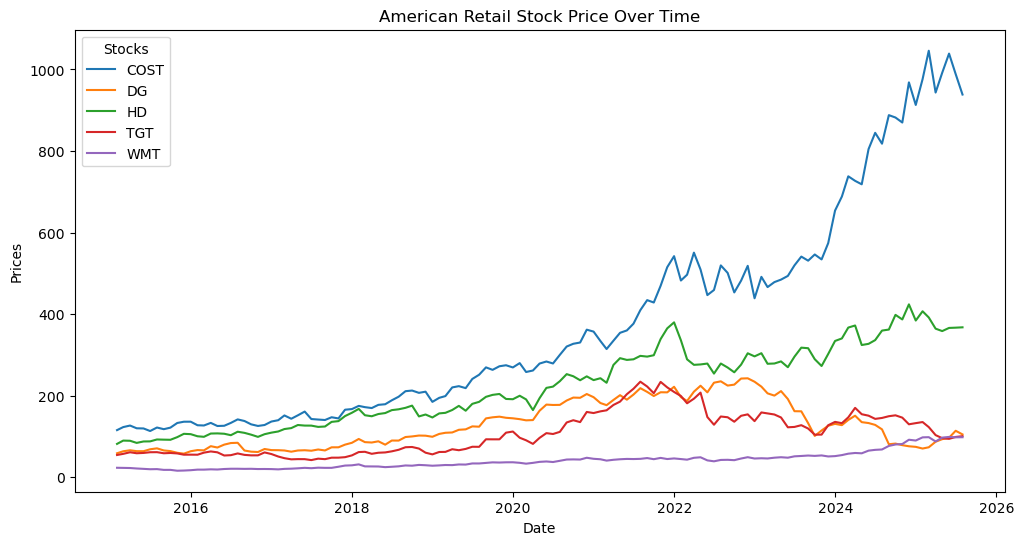

In [15]:
plt.figure(figsize=(12, 6))
for column in monthly_data.columns:
    plt.plot(monthly_data[column], label=column)
plt.title('American Retail Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Prices')
plt.grid(False)
plt.legend(title='Stocks')
plt.show()

# Method 1: Manual ARIMA Model

In [21]:
wmt_data.tail()

Date
2025-03-31    87.578255
2025-04-30    97.015434
2025-05-31    98.720001
2025-06-30    97.779999
2025-07-31    97.980003
Freq: ME, Name: WMT, dtype: float64

In [47]:
wmt_model = ARIMA(wmt_data, order=(1, 1, 1))
wmt_results = wmt_model.fit()
wmt_forecast = wmt_results.forecast(steps=5)
wmt_forecast

2025-08-31    97.962699
2025-09-30    97.964232
2025-10-31    97.964096
2025-11-30    97.964108
2025-12-31    97.964107
Freq: ME, Name: predicted_mean, dtype: float64

# Method 2: Auto ARIMA Model

In [74]:
def optimal_order(data):
    optimal_model = pm.auto_arima(data, start_p=0, start_q=0, seasonal=False, stepwise=False, suppress_warnings=True, error_action='ignore')
    return optimal_model.order

In [79]:
def auto_arima_forecast(data):
    model = ARIMA(data, order=optimal_order(data))
    results=model.fit()
    forecast=results.forecast(steps=5)
    return forecast

In [81]:
auto_arima_forecast(wmt_data)

2025-08-31    100.751773
2025-09-30    102.526463
2025-10-31    104.062325
2025-11-30    105.875722
2025-12-31    107.656607
Freq: ME, Name: predicted_mean, dtype: float64

In [80]:
auto_arima_forecast(tgt_data)

2025-08-31     96.857132
2025-09-30     97.137501
2025-10-31    100.666822
2025-11-30    102.062396
2025-12-31    102.062396
Freq: ME, Name: predicted_mean, dtype: float64

In [82]:
auto_arima_forecast(cost_data)

2025-08-31    958.495232
2025-09-30    961.491105
2025-10-31    937.021425
2025-11-30    937.021425
2025-12-31    937.021425
Freq: ME, Name: predicted_mean, dtype: float64

In [83]:
auto_arima_forecast(hd_data)

2025-08-31    371.334129
2025-09-30    372.138620
2025-10-31    370.385254
2025-11-30    369.536249
2025-12-31    369.223145
Freq: ME, Name: predicted_mean, dtype: float64